<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 4 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Réalisez une étude de santé publique avec R ou Python
</h2>
</div>

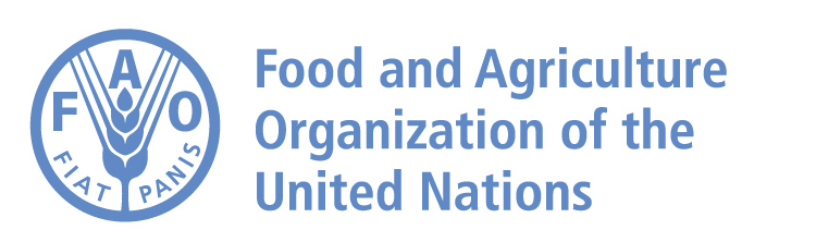
# OBJECTIF DE CE NOTEBOOK

Dans ce notebook nous avons réalisé une étude de santé publique, nous intervenons en tant que Data Analyst au sein d'une équipe de chercheurs de la Food and Agriculture Organization of the United Nations (La FAO), un des organes qui composent l’ONU et dont l’objectif est "d’aider à construire un monde libéré de la faim". Cette étude sur le thème de l'alimentation et plus précisément la sous-nutrition concerne la période 2013-2017.

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [5]:
#Importation de la librairie Pandas
import pandas as pd 
#Importation de Numpy
import numpy as np
#Importation de matplotlib
import matplotlib.pyplot as plt

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [7]:
#Importation du fichier population.csv
population = pd.read_csv('population.csv')

#Importation du fichier dispo_alimentaire.csv
dispo_alimentaire = pd.read_csv('dispo_alimentaire.csv')

#Importation du fichier aide_alimentaire.csv
aide_alimentaire = pd.read_csv('aide_alimentaire.csv')

#Importation du fichier sous_nutrition.csv
sous_nutrition = pd.read_csv('sous_nutrition.csv')

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier population</h3>
</div>

In [10]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(population.shape[0]))
print("Le tableau comporte {} colonne(s)".format(population.shape[1]))

Le tableau comporte 1416 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [11]:
#Vérification des doublons sur toutes les colonnes 
doublons = population[population.duplicated()]

# Afficher les doublons (si existants)
print("Nombre de doublons :", len(doublons))

Nombre de doublons : 0


In [12]:
#changement du nom de la colonne Valeur par Population
population = population.rename(columns={'Valeur': 'Population'})
# Afficher les premières lignes pour vérifier
population.head()

,Zone,Année,Population
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [13]:
#Vérifiaction des valeurs manquantes 
population.isna().any()

Zone          False
Année         False
Population    False
dtype: bool

Il n'y a pas de valeurs manquantes dans le DataFrame population

In [15]:
#Nous allons harmoniser les unités. Pour cela, nous avons décidé de multiplier la population par 1000
#Multiplication de la colonne valeur par 1000
population['Population'] = population['Population'] * 1000

Ici les valeurs de population contiennent des décimales, nous allons les convertir en nombres entiers.

In [17]:
#Changement des valeurs de la colonne Population en nombre entier
population['Population'] = population['Population'].astype(int)
population.head()

,Zone,Année,Population
0,Afghanistan,2013,32269589
1,Afghanistan,2014,33370794
2,Afghanistan,2015,34413603
3,Afghanistan,2016,35383032
4,Afghanistan,2017,36296113


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier dispo_alimentaire</h3>
</div>

In [19]:
#Afficher les dimensions du dataset
print("Dimensions du dataset :", dispo_alimentaire.shape)

Dimensions du dataset : (15605, 18)


In [20]:
#Affichage les 5 premières lignes de la table
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [21]:
#Vérification des doublons sur toutes les colonnes 
doublons = dispo_alimentaire[dispo_alimentaire.duplicated()]

# Afficher les doublons (si existants)
print("Nombre de doublons :", len(doublons))

Nombre de doublons : 0


In [22]:
# Remplacement des NaN dans le dataset par des 0
dispo_alimentaire = dispo_alimentaire.fillna(0)

In [23]:
# Multiplication de toutes les lignes contenant des milliers de tonnes en Kg
dispo_alimentaire[['Aliments pour animaux', 'Autres Utilisations', 'Disponibilité alimentaire en quantité (kg/personne/an)', 'Disponibilité de matière grasse en quantité (g/personne/jour)', 'Disponibilité de protéines en quantité (g/personne/jour)', ' Disponibilité intérieure',  'Exportations - Quantité', 'Importations - Quantité', 'Nourriture', ' Pertes', 'Production', 'Semences', 'Traitement', 'Variation de stock']] = dispo_alimentaire[['Aliments pour animaux', 'Autres Utilisations', 'Disponibilité alimentaire en quantité (kg/personne/an)', 'Disponibilité de matière grasse en quantité (g/personne/jour)', 'Disponibilité de protéines en quantité (g/personne/jour)', 'Disponibilité intérieure',  'Exportations - Quantité', 'Importations - Quantité', 'Nourriture', 'Pertes', 'Production', 'Semences', 'Traitement', 'Variation de stock']] * 1000000

In [24]:
# Affichage des 5 premières lignes de la table
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Disponibilité intérieure,Pertes
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1720000.0,200000.0,770000.0,53.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0,53000000.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1290000.0,10000.0,20000.0,41.0,2000000.0,40000000.0,39000000.0,2.0,3000000.0,0.0,0.0,0.0,41000000.0,2000000.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,60000.0,10000.0,30000.0,2.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0,2000000.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2700000.0,20000.0,50000.0,82.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0,82000000.0,0.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier aide_alimentaire</h3>
</div>

In [26]:
#Affichage des dimensions du dataset aide_alimentaire
print("Dimensions du dataset :", aide_alimentaire.shape)

Dimensions du dataset : (1475, 4)


In [27]:
#Consulter le nombre de colonnes
print("Nombre de colonnes:",len(aide_alimentaire.columns))

Nombre de colonnes: 4


In [28]:
#Vérification des doublons sur toutes les colonnes 
doublons = aide_alimentaire[aide_alimentaire.duplicated()]

# Afficher les doublons (si existants)
print("Nombre de doublons :", len(doublons))

Nombre de doublons : 0


In [29]:
#Vérification de la présence de valeurs manquantes 
aide_alimentaire.isna().any()

Pays bénéficiaire    False
Année                False
Produit              False
Valeur               False
dtype: bool

Il n'y a pas de valeurs manquantes dans le DataFrame aide_alimentaire 

In [31]:
#Affichage des 5 premières lignes de la table
aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [32]:
# Changement du nom de la colonne 'Pays bénéficiaire' par 'Zone'
aide_alimentaire = aide_alimentaire.rename(columns={'Pays bénéficiaire': 'Zone'})

In [33]:
# Multiplication de la colonne Aide_alimentaire qui contient des tonnes par 1000 pour avoir des kg
aide_alimentaire['Valeur'] = aide_alimentaire['Valeur'] * 1000

In [34]:
# Affichage les 5 premières lignes de la table avce la valeur en kg
aide_alimentaire.head()

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.4 - Analyse exploratoire du fichier sous_nutrition</h3>
</div>

In [36]:
#Affichage des dimensions du dataset
print("Le tableau comporte {} observations ou article(s)".format(sous_nutrition.shape[0]))
print("Le tableau comporte {} colonnes".format(sous_nutrition.shape[1]))

Le tableau comporte 1218 observations ou article(s)
Le tableau comporte 3 colonnes


In [37]:
#Vérification des doublons sur toutes les colonnes 
doublons = sous_nutrition[sous_nutrition.duplicated()]

# Afficher les doublons (si existants)
print("Nombre de doublons :", len(doublons))

Nombre de doublons : 0


In [38]:
#Vérification de la présence de valeur NA
sous_nutrition.isna().any()

Zone      False
Année     False
Valeur     True
dtype: bool

In [39]:
sous_nutrition.isna().sum()

Zone        0
Année       0
Valeur    594
dtype: int64

L'analyse des valeurs manquantes révèle que la colonne 'Valeur' comporte des données non renseignées (594 NaN sur 1218 observations, soit 49 %). Ces manquants reflètent probablement des cas où la sous-nutrition n'a pas été mesurée ou déclarée. Afin d'éviter tout biais d'interprétation (comme une sous-estimation artificielle du nombre de personnes en sous-nutrition), nous conservons ces valeurs manquantes et les excluons explicitement des calculs statistiques avec skipna=True. Cette approche préserve l'intégrité des résultats.

In [41]:
sous_nutrition.skipna=True

In [42]:
#Affichage des 5 premières lignes de la table
sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [43]:
#Conversion de la colonne sous nutrition en numérique (avec l'argument errors=coerce qui permet de convertir les lignes qui ne sont pas des nombres en NaN)
sous_nutrition["Valeur"] = pd.to_numeric(sous_nutrition["Valeur"], errors="coerce")

In [44]:
#Remplacement des NaN en 0
sous_nutrition["Valeur"] = sous_nutrition["Valeur"].fillna(0)

In [45]:
#changement du nom de la colonne Valeur par sous_nutrition
sous_nutrition = sous_nutrition.rename(columns={"Valeur": "sous_nutrition"})

In [46]:
#Multiplication de la colonne sous_nutrition par 1000000 pour avoir la valeur exprimée en millions d’habitants
sous_nutrition["sous_nutrition"] = sous_nutrition["sous_nutrition"] * 1000000

In [47]:
#Changement des valeurs de la colonne sous_nutrition en nombre entier 
sous_nutrition["sous_nutrition"] = sous_nutrition["sous_nutrition"].astype(int)

In [48]:
#Afficher les 5 premières lignes de la table après la conversion de la colonne 'sous_nutrition' en millions d'habitants
sous_nutrition.head()

,Zone,Année,sous_nutrition
0,Afghanistan,2012-2014,8600000
1,Afghanistan,2013-2015,8800000
2,Afghanistan,2014-2016,8900000
3,Afghanistan,2015-2017,9700000
4,Afghanistan,2016-2018,10500000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Proportion de personnes en sous nutrition</h3>
</div>

In [50]:
#Uniformisation de la table sous_nutrition en remplacement l'intervalle par l'année 
sous_nutrition['Année'] = sous_nutrition['Année'].replace("2012-2014", "2013")
sous_nutrition['Année'] = sous_nutrition['Année'].replace("2013-2015", "2014")
sous_nutrition['Année'] = sous_nutrition['Année'].replace("2014-2016", "2015")
sous_nutrition['Année'] = sous_nutrition['Année'].replace("2015-2017", "2016")
sous_nutrition['Année'] = sous_nutrition['Année'].replace("2016-2018", "2017")
sous_nutrition['Année'] = sous_nutrition['Année'].replace("2017-2019", "2018")

Afin de fusionner les données des DataFrames population et sous_nutrition, nous avons uniformisé la colonne Année du DataFrame sous_nutrition en remplaçant les intervalles par l'année correspondante. Ensuite, nous avons converti le type de cette colonne en string pour pouvoir appliquer un filtre spécifique sur l'année 2017

In [52]:
#Changement du type de la colonne 'Année' en string
population['Année'] = population['Année'].astype(str)

In [53]:
# Filtre pour l'année 2017 les tables population et sous_nutrition
population_2017 = population[population['Année'] == '2017']
sous_nutrition_2017 = sous_nutrition[sous_nutrition['Année'] == '2017']

In [54]:
#Affichage de la table sous_nutrition_2017
sous_nutrition_2017.head()

,Zone,Année,sous_nutrition
4,Afghanistan,2017,10500000
10,Afrique du Sud,2017,3100000
16,Albanie,2017,100000
22,Algérie,2017,1300000
28,Allemagne,2017,0


In [55]:
# Jointure entre la table population et la table sous nutrition, en ciblant l'année 2017
Personne_en_sous_nutrition_2017 = pd.merge(
    population_2017, 
    sous_nutrition_2017,
    how='left', 
    on=['Zone', 'Année'])

#Affichage du DataFrame
Personne_en_sous_nutrition_2017.head()

,Zone,Année,Population,sous_nutrition
0,Afghanistan,2017,36296113,10500000.0
1,Afrique du Sud,2017,57009756,3100000.0
2,Albanie,2017,2884169,100000.0
3,Algérie,2017,41389189,1300000.0
4,Allemagne,2017,82658409,0.0


Nous avons afféctué une jointure des nouveaux DataFrame population_2017 et sous_nutrition_2017 avec la fonction pd.merge, ce qUi nous permet de calculer le nombre de personnes en état de sous-nutrition et le taux de sous-nutrition. 

In [57]:
# Calcul du total de la population mondiale en 2017
total_population_2017 = Personne_en_sous_nutrition_2017['Population'].sum()

# Affichage du nombre de la population mondiale en 2017:
print(f"{total_population_2017:,}".replace(",", " "))

7 548 134 097


In [58]:
# Calcul du total de personnes en sous-nutrition en 2017
total_sous_nutrition_2017 = Personne_en_sous_nutrition_2017['sous_nutrition'].sum()

#Affichage du nombre de personnes en état de sous-nutrition
print(f"Le nombre de personnes en état de sous-nutrition est de : {total_sous_nutrition_2017:.0f} personnes")

Le nombre de personnes en état de sous-nutrition est de : 535700000 personnes


In [59]:
# Calcul du de sous-nutrition en pourcentage %
proportion_sous_nutrition_2017 = (total_sous_nutrition_2017 / total_population_2017) * 100

# Afficher le résultat avec 2 décimales
print(f"Le taux de sous nutrition dans le monde en 2017 est de : {proportion_sous_nutrition_2017:.2f}%")


Le taux de sous nutrition dans le monde en 2017 est de : 7.10%


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Nombre théorique de personne qui pourrait être nourries</h3>
</div>

Un humain consomme 2500 kcal selon la FAO

In [62]:
# Jointure entre le data frame population et dispo_alimentaire afin d'ajouter dans ce dernier la population
Personnes_nourries = pd.merge(population, dispo_alimentaire)

# Filtrer le DataFrame pour ne garder que les données de 2017
Personnes_nourries_2017 = Personnes_nourries[Personnes_nourries["Année"] == '2017']

In [63]:
# Création d'un DataFrame pour la disponibilité alimentaire
dispo_par_pays = (Personnes_nourries_2017.groupby('Zone').agg(Population=('Population', 'first'), Disponibilité_totale_kcal=('Disponibilité alimentaire (Kcal/personne/jour)', 'sum')).reset_index())

# Affichage du nouveau Dataframe
dispo_par_pays.head()

,Zone,Population,Disponibilité_totale_kcal
0,Afghanistan,36296113,2087.0
1,Afrique du Sud,57009756,3020.0
2,Albanie,2884169,3188.0
3,Algérie,41389189,3293.0
4,Allemagne,82658409,3503.0


In [64]:
# Calcul du Total de la disponibilité alimentaire
kcal_dispo = (dispo_par_pays['Disponibilité_totale_kcal'] * dispo_par_pays['Population']).sum()

# Calcul du nombre d'humains pouvant être nourris
nb_personnes_nourries = round(kcal_dispo / 2500)

# Affichage du nombre théorique de personnes qui pourraient être nourries
print(f"Le nombre théorique de personnes qui pourraient être nourries est de {nb_personnes_nourries:,.0f}".replace(",", " "), "personnes")


Le nombre théorique de personnes qui pourraient être nourries est de 8 367 593 844 personnes


In [65]:
# Calcul du pourcentage de la population mondiale qui pourrait être nourrie
total_population = dispo_par_pays['Population'].sum()
pourcentage_nourri = (nb_personnes_nourries / total_population) * 100

#Affichage du pourcentage de la population mondiale qui pourrait être nourrie
print(f"Pourcentage de la population mondiale pouvant être nourrie : {pourcentage_nourri:.0f}%")

Pourcentage de la population mondiale pouvant être nourrie : 115%


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux</h3>
</div>

In [67]:
# Filtrer les données végétales
vegetaux = Personnes_nourries_2017[Personnes_nourries_2017['Origine'] == 'vegetale']

# Calcul des kcal végétales disponibles mondialement
kcal_vegetaux = (vegetaux['Disponibilité alimentaire (Kcal/personne/jour)'] * vegetaux['Population']).sum()

# Calcul du nombre d'humains nourris (besoin = 2500 kcal/jour)
nb_personnes_nourries_vegetaux = round(kcal_vegetaux / 2500)

#Affichage du nombre théorique de personnes nourries avec les végétaux 
print(f"Nombre théorique de personnes nourries avec les végétaux : {nb_personnes_nourries_vegetaux:,}".replace(',', ' ') + "personnes")

Nombre théorique de personnes nourries avec les végétaux : 6 904 305 679personnes


In [68]:
# Calcul du pourcentage des personnes qui pourrait etre nourrie avec les végétaux
total_population = dispo_par_pays['Population'].sum()
pourcentage_vegetaux = int((nb_personnes_nourries_vegetaux / total_population) * 100)

print(f"Pourcentage de la population mondiale pouvant être nourrie par les végétaux : {pourcentage_vegetaux}%")

Pourcentage de la population mondiale pouvant être nourrie par les végétaux : 94%


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - Utilisation de la disponibilité intérieure</h3>
</div>

Dans cette partie nous allons calculer la disponibilité intérieure totale mondiale (La quantité totale de nourriture disponible dans un pays) et nous allons aussi créer un tableau afin de visualiser la répartition de cette disponibilité intérieure entre la nourriture pour humain et les aliments pour animaux. 
Cela va nous permettre de savoir quelle est la part de l'utilisation de la disponibilité intérieure.

In [71]:
#Calcul de la disponibilité intérieure 
dispo_interieure_totale = (
    Personnes_nourries_2017['Production'].sum() 
    + Personnes_nourries_2017['Importations - Quantité'].sum()
    - Personnes_nourries_2017['Exportations - Quantité'].sum()
    - Personnes_nourries_2017['Aliments pour animaux'].sum()
    - Personnes_nourries_2017['Semences'].sum()
    - Personnes_nourries_2017['Pertes'].sum()
    - Personnes_nourries_2017['Traitement'].sum()
    + Personnes_nourries_2017['Variation de stock'].sum())

# Affichage de la disponibilité intérieure mondiale en kg/an
print(f"Disponibilité intérieure mondiale totale : {dispo_interieure_totale:,.0f}".replace(',', ' ') + " kg/an")

Disponibilité intérieure mondiale totale : 6 107 144 547 717 kg/an


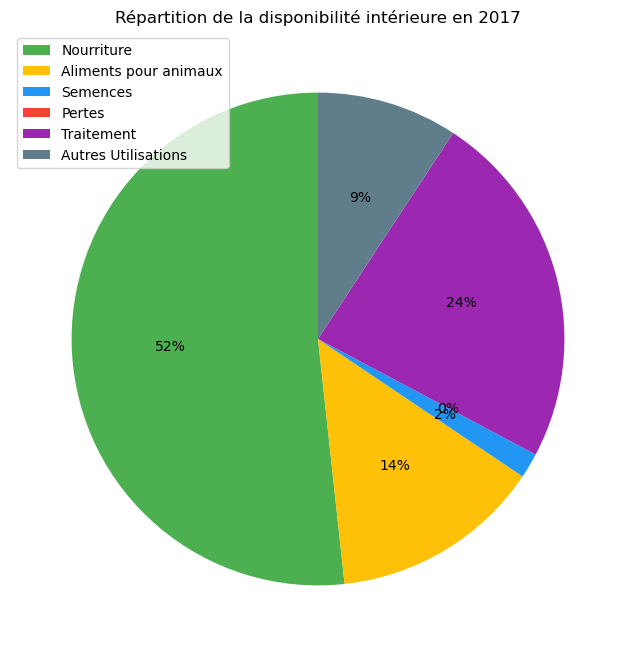

In [72]:
# Calcul des totaux pour chaque catégorie
totals = {
    'Nourriture': Personnes_nourries_2017['Nourriture'].sum(),
    'Aliments pour animaux': Personnes_nourries_2017['Aliments pour animaux'].sum(),
    'Semences': Personnes_nourries_2017['Semences'].sum(),
    'Pertes': Personnes_nourries_2017['Pertes'].sum(),
    'Traitement': Personnes_nourries_2017['Traitement'].sum(),
    'Autres Utilisations': Personnes_nourries_2017['Autres Utilisations'].sum()
}

# Calcul des pourcentages
total = sum(totals.values())
percentages = {k: (v/total)*100 for k, v in totals.items()}

# Création du pie chart
plt.figure(figsize=(10, 8))
plt.pie(
    x=percentages.values(),
    autopct='%1.0f%%',  # Garde les pourcentages sur le chart
    startangle=90,
    colors=['#4CAF50', '#FFC107', '#2196F3', '#F44336', '#9C27B0', '#607D8B'])
    
# Ajout de la légende
plt.legend(labels=percentages.keys())

# Ajout du titre
plt.title("Répartition de la disponibilité intérieure en 2017")

# Affichage du graphique 
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - Utilisation des céréales</h3>
</div>

In [74]:
#Création d'une liste avec toutes les variables
cereales = ['Blé','Riz','Orge','Maïs','Seigle','Avoine','Millet','Sorgho','Céréales, Autres', 'Soja']

In [75]:
#Création d'un dataframe avec les informations uniquement pour ces céréales
dispo_cereale = dispo_alimentaire.loc[dispo_alimentaire["Produit"].isin(cereales)].sum()

In [76]:
#Création d'un nouveau DataFrame avec uniquement les céreales
dispo_cereales = dispo_alimentaire[dispo_alimentaire["Produit"].isin(cereales)][["Nourriture", "Aliments pour animaux"]].sum()

In [77]:
# Affichage de la proportion pour les humains et les animaux
print(f"Nourriture humaine : {dispo_cereale['Nourriture']:,.0f}".replace(',', ' ') + " Kg")
print(f"Aliments animaux   : {dispo_cereale['Aliments pour animaux']:,.0f}".replace(',', ' ') + " Kg")

Nourriture humaine : 662 372 000 000 Kg
Aliments animaux   : 857 417 000 000 Kg


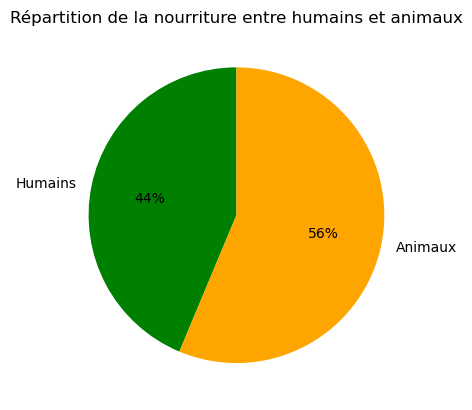

In [78]:
# Données 
nourriture_humaine = 651_724_000_000  
nourriture_animaux = 839_941_000_000  

# Affichage diagramme circulaire
plt.pie([nourriture_humaine, nourriture_animaux],
        labels=['Humains', 'Animaux'],
 # Pourcentages avec 1 décimale        
        autopct='%1.0f%%', 
        colors=['green', 'orange'],
        startangle=90)


plt.title('Répartition de la nourriture entre humains et animaux')
plt.show()

In [79]:
# Liste des céréales 
cereales = ['Blé', 'Riz', 'Orge', 'Maïs', 'Seigle', 'Avoine', 'Millet', 'Sorgho', 'Céréales, Autres', 'Soja']

# Filtrage et agrégation 
dispo_cereale = (dispo_alimentaire[dispo_alimentaire["Produit"].isin(cereales)].groupby('Produit')[['Nourriture', 'Aliments pour animaux']].sum().reset_index())


dispo_cereale['Nourriture'] = dispo_cereale['Nourriture'].apply(lambda x: f"{x:,.0f}".replace(',', ' '))
dispo_cereale['Aliments pour animaux'] = dispo_cereale['Aliments pour animaux'].apply(lambda x: f"{x:,.0f}".replace(',', ' '))

# Affichage des totaux par céréale
dispo_cereale

,Produit,Nourriture,Aliments pour animaux
0,Avoine,3 903 000 000,16 251 000 000
1,Blé,457 824 000 000,129 668 000 000
2,"Céréales, Autres",5 324 000 000,19 035 000 000
3,Maïs,125 184 000 000,546 116 000 000
4,Millet,23 040 000 000,3 306 000 000
5,Orge,6 794 000 000,92 658 000 000
6,Seigle,5 502 000 000,8 099 000 000
7,Soja,10 648 000 000,17 476 000 000
8,Sorgho,24 153 000 000,24 808 000 000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.6 - Pays avec la proportion de personnes sous-alimentée la plus forte en 2017</h3>
</div>

In [81]:
#Création de la colonne taux de sous nutrition
Personne_en_sous_nutrition_2017['Taux_sous_nutrition'] = (Personne_en_sous_nutrition_2017['sous_nutrition'] / Personne_en_sous_nutrition_2017['Population'] * 100).round(2)

In [82]:
# Affichage de la table Personne_en_sous_nutrition_2017 avec la colonne taux de sous nutrition
Personne_en_sous_nutrition_2017.head()

,Zone,Année,Population,sous_nutrition,Taux_sous_nutrition
0,Afghanistan,2017,36296113,10500000.0,28.93
1,Afrique du Sud,2017,57009756,3100000.0,5.44
2,Albanie,2017,2884169,100000.0,3.47
3,Algérie,2017,41389189,1300000.0,3.14
4,Allemagne,2017,82658409,0.0,0.00


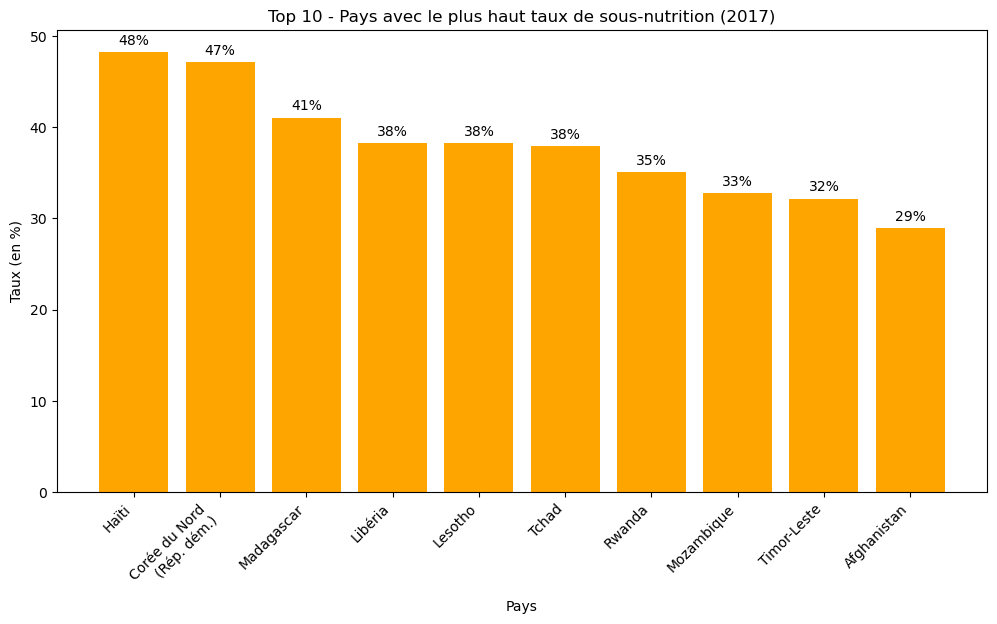

In [83]:
# Création d'un dataframe avec le TOP10 des pays avec le plus haut taux de sous nutrition
top10 = Personne_en_sous_nutrition_2017.nlargest(10, 'Taux_sous_nutrition')

#Graphique representant les 10 pays avec le plus haut taux de sous nutrition en 2017
labels = top10['Zone'].replace({'République populaire démocratique de Corée': 'Corée du Nord\n(Rép. dém.)'})

plt.figure(figsize=(12, 6))
bars = plt.bar(labels, top10['Taux_sous_nutrition'], color='orange')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f'{height:.0f}%',
    ha='center', va='bottom')

plt.title('Top 10 - Pays avec le plus haut taux de sous-nutrition (2017)')
plt.xlabel('Pays')
plt.ylabel('Taux (en %)')
plt.xticks(rotation=45, ha='right')
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013</h3>
</div>

In [85]:
# Analyse des données
aide_par_pays = aide_alimentaire.groupby('Zone')['Valeur'].sum().reset_index()

# Sélection du top 10 
top10_aide = aide_par_pays.sort_values('Valeur', ascending=False).head(10)

# Formatage avec séparateurs de milliers
top10_aide['Valeur'] = top10_aide['Valeur'].apply(lambda x: f"{x:,.0f}".replace(',', ' '))

#Affichage du top 10 des pays ayant le plus bénéficié d'aide alimentaire depuis 2013 
top10_aide

,Zone,Valeur
50,République arabe syrienne,1 858 943 000
75,Éthiopie,1 381 294 000
70,Yémen,1 206 484 000
61,Soudan du Sud,695 248 000
60,Soudan,669 784 000
30,Kenya,552 836 000
3,Bangladesh,348 188 000
59,Somalie,292 678 000
53,République démocratique du Congo,288 502 000
43,Niger,276 344 000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016</h3>
</div>

In [87]:
#Création d'un Dataframe avec la zone, l'année et l'aide alimentaire puis groupby sur zone et année 
aide_2013_2016 = aide_alimentaire.groupby(['Zone', 'Année'])['Valeur'].sum().reset_index()

In [88]:
#Liste des 5 pays ayant le plus bénéficié de l'aide alimentaire entre 2013 et 2016
top5_pays = aide_2013_2016.groupby('Zone')['Valeur'].sum().nlargest(5).reset_index()

# Formatage des valeurs avec séparateurs de milliers 
top5_pays['Valeur'] = top5_pays['Valeur'].apply(lambda x: f"{x:,.0f}".replace(",", " "))

# Affichage
top5_pays

,Zone,Valeur
0,République arabe syrienne,1 858 943 000
1,Éthiopie,1 381 294 000
2,Yémen,1 206 484 000
3,Soudan du Sud,695 248 000
4,Soudan,669 784 000


In [89]:
#On filtre sur le dataframe avec notre liste
# Liste exacte des 5 pays à partir de votre résultat
pays_top5 = ["République arabe syrienne", "Éthiopie", "Yémen", "Soudan du Sud", "Soudan"]

# Filtrage du DataFrame original par zone
df_top5_2013_2016 = aide_alimentaire[aide_alimentaire['Zone'].isin(pays_top5)]

In [90]:
# Affichage des pays avec l'aide alimentaire par année
Top5_par_année = df_top5_2013_2016.groupby(['Zone', 'Année'])['Valeur'].sum().reset_index()

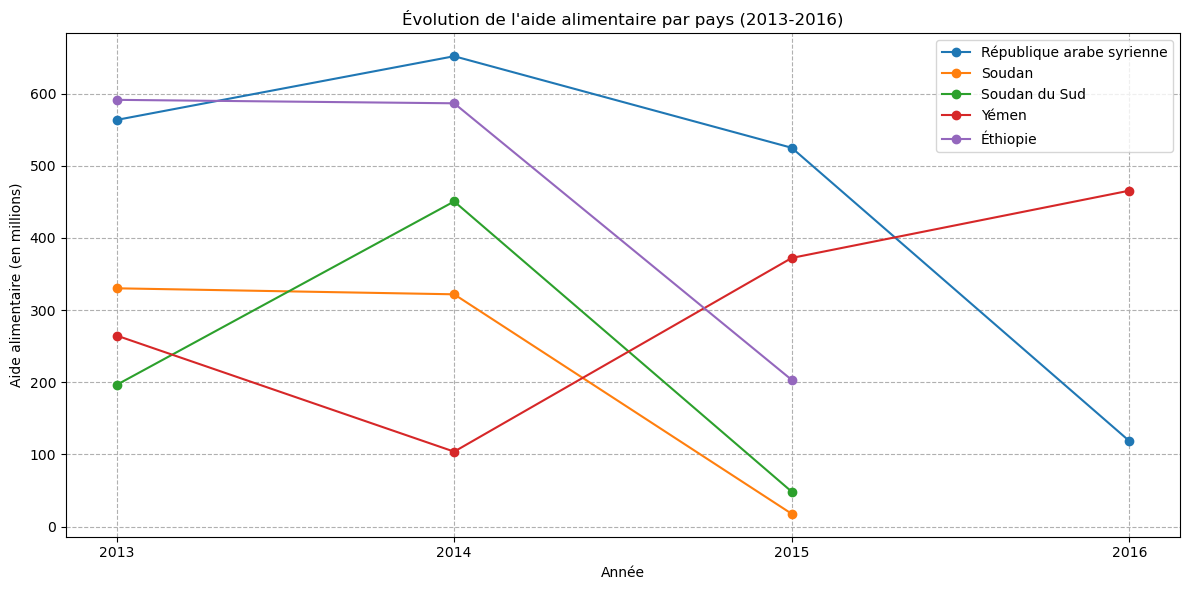

In [91]:
# Création du graphique
plt.figure(figsize=(12, 6)) 

# Tracage d'une courbe pour chaque pays
for pays in Top5_par_année['Zone'].unique():
    donnees_pays = Top5_par_année[Top5_par_année['Zone'] == pays]
    plt.plot(donnees_pays['Année'], 
             donnees_pays['Valeur']/1e6,
     # Ajoute des points sur la courbe         
             marker='o',  
             label=pays)


plt.title("Évolution de l'aide alimentaire par pays (2013-2016)")
plt.xlabel("Année")
plt.ylabel("Aide alimentaire (en millions)")

# Forcer l'affichage de toutes les années
plt.xticks([2013, 2014, 2015, 2016]) 
# Affichage de la légende
plt.legend()  
# Grille en pointillés en arrière plan
plt.grid(linestyle='--') 

# Affichage
plt.tight_layout()
plt.show()

Depuis 2014, on note une baisse significative de l'aide alimentaire dans ces nations, sauf dans le cas  du Yémen. Plusieurs éléments importants peuvent expliquer cette diminution radicale, voire l'absence totale de soutien dans certains cas à partir de 2015 :

Les conflits armés qui ont entravé ou restreint l'accès des organisations humanitaires, les catastrophes météorologiques récurrentes (comme les sécheresses et les inondations) ont ravagé les cultures et les infrastructures, le manque chronique de financement des programmes d'aide à l'échelle internationale.

Une autre explication pourrait être la incapacité de la FAO à collecter les données dans certains de ces pays en situation de crise.
L'accumulation de ces entraves an intensifié la situation d'insécurité alimentaire, rendant difficile à la fois la distribution de l'assistance et la satisfaction des besoins alimentaires.

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.9 - Pays avec le moins de disponibilité par habitant</h3>
</div>

In [94]:
#Tri de la disponibilité par pays par ordre croissant 
pays_faible_dispo = dispo_par_pays.sort_values('Disponibilité_totale_kcal', ascending=True)

In [95]:
#Affichage des 10 pays qui ont le moins de dispo alimentaire par habitant
top10_faible_dispo = pays_faible_dispo[['Zone', 'Disponibilité_totale_kcal']]\
                      .sort_values(by='Disponibilité_totale_kcal', ascending=True) \
                    .head(10)
#Affichage du dataframe sans les décimales 
top10_faible_dispo['Disponibilité_totale_kcal'] = top10_faible_dispo['Disponibilité_totale_kcal'].astype(int)
top10_faible_dispo

,Zone,Disponibilité_totale_kcal
127,République centrafricaine,1879
164,Zambie,1924
91,Madagascar,2056
0,Afghanistan,2087
65,Haïti,2089
132,République populaire démocratique de Corée,2093
150,Tchad,2109
165,Zimbabwe,2113
114,Ouganda,2126
170,Éthiopie,2129


Ce tableau présente les pays où la disponibilité alimentaire (en kcal par habitant et par jour) est la plus faible. La République centrafricaine arrive en tête de liste avec seulement 1 879 kcal, un chiffre bien inférieur aux besoins quotidiens moyens estimés à 2 500 kcal. Les autres pays cités sont également confrontés à des pénuries alimentaires, souvent causées par des facteurs structurels tels que les conflits armés, la pauvreté chronique ou des infrastructures agricoles insuffisantes.

L’écart entre la République centrafricaine (le pays le plus touché) et l’Éthiopie (le moins touché parmi ceux mentionnés) reste relativement faible, ce qui révèle une situation de malnutrition généralisée dans la région. Ces données soulignent l’urgence d’une intervention humanitaire renforcée et d’un soutien au développement agricole pour améliorer la sécurité alimentaire dans ces zones

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.10 - Pays avec le plus de disponibilité par habitant</h3>
</div>

In [98]:
#Affichage des 10 pays qui ont le plus de dispo alimentaire par habitant
top10_pays = dispo_par_pays.nlargest(10, 'Disponibilité_totale_kcal')[['Zone', 'Disponibilité_totale_kcal']]

#Affichage du dataframe sans les décimales   
top10_pays['Disponibilité_totale_kcal'] = top10_pays['Disponibilité_totale_kcal'].astype(int)
top10_pays

,Zone,Disponibilité_totale_kcal
11,Autriche,3770
16,Belgique,3737
157,Turquie,3708
169,États-Unis d'Amérique,3682
74,Israël,3610
72,Irlande,3602
75,Italie,3578
89,Luxembourg,3540
166,Égypte,3518
4,Allemagne,3503


Ces données révèlent que les pays développés comme l'Autriche, la Belgique, les États-Unis et certaines économies émergentes comme la Turquie et Égypte disposent d'une disponibilité calorique élevée >3,500 kcal/personne/jour, dépassant largement les besoins moyens d'un adulte ~2,500 kcal d'après la FAO. 

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.11 - Exemple de la Thaïlande pour le Manioc</h3>
</div>

Nous allons nous intéresser au cas de la Thaïlande en analysant les exportations et les importations de Manioc. Pour cela nous allons premièrement créer un DataFrame avec la population et la sous nutrition.

In [102]:
#Nouveau dataframe avec population et sous nutrition
Personne_en_sous_nutrition = pd.merge(population, sous_nutrition, how='left', on='Zone')

In [103]:
# Filtre des données pour la Thaïlande
sous_nutrition_thaïlande = Personne_en_sous_nutrition[
    Personne_en_sous_nutrition['Zone'] == 'Thaïlande'].copy()

# calcul du taux de sous-nutrition (%) et ajout du taux de sous nutrition comme nouvelle colonne
sous_nutrition_thaïlande['taux_sous_nutrition'] = (sous_nutrition_thaïlande['sous_nutrition'] / 
    sous_nutrition_thaïlande['Population'] * 100)

# Affichage 
sous_nutrition_thaïlande

#Copie du Data Frame dispo_alimentaire avec un filtre sur le Manioc pour la Thaïland
dispo_manioc_thailande = dispo_alimentaire[(dispo_alimentaire['Zone'] == 'Thaïlande')
& (dispo_alimentaire['Produit'] == 'Manioc')]

#Affichage 
dispo_manioc_thailande

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Disponibilité intérieure,Pertes
13809,Thaïlande,Manioc,vegetale,1.800000e+09,2.081000e+09,40.0,13000000.0,50000.0,140000.0,6264.0,2.521400e+10,1.250000e+09,871000000.0,1511.0,3.022800e+10,0.0,0.0,0.0,6.264000e+09,1.511000e+09


In [104]:
# Sélection des colonnes
info_thailande_df = dispo_manioc_thailande[['Production', 'Exportations - Quantité', 'Importations - Quantité', 'Nourriture']].copy()

# Division par 1e9 pour convertir la production, exportation et importation en milliers de tonnes
colonnes_a_diviser = ['Production', 'Exportations - Quantité', 'Importations - Quantité']
info_thailande_df[colonnes_a_diviser] = info_thailande_df[colonnes_a_diviser] / 1e6

# Affichage
info_thailande_df

,Production,Exportations - Quantité,Importations - Quantité,Nourriture
13809,30228.0,25214.0,1250.0,871000000.0


In [105]:
# Filtrer la Thaïlande et récupérer le taux de sous_nutrition
taux_thailande = Personne_en_sous_nutrition_2017.loc[Personne_en_sous_nutrition_2017['Zone'] == 'Thaïlande',
    'Taux_sous_nutrition'
].item()

#Affichage du taux de sous nutrition pour la thaïland
print(f"Taux de sous-nutrition en Thaïlande (2017) : {taux_thailande}%")

Taux de sous-nutrition en Thaïlande (2017) : 8.96%


La Thaïlande exporte la majeure partie de sa production de manioc, principalement sous forme de produits industriels. Le manioc n'étant pas couramment consommé localement, sa contribution à l'alimentation nationale est limitée. Pourtant, avec un taux de sous-nutrition avoisinant les 9 %, le pays pourrait bénéficier d'une valorisation accrue du manioc dans l'alimentation domestique. Des initiatives visant à diversifier les produits alimentaires à base de manioc et à sensibiliser la population à ses avantages nutritionnels pourraient contribuer à améliorer la sécurité alimentaire. Cependant, cela impliquerait des efforts pour changer les habitudes alimentaires et développer des produits à base de manioc adaptés aux préférences locales.

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Analyse complémentaires</h2>
</div>

In [108]:
# Calcul du taux d'exportation du Manioc en Thaïlande
taux_export = (info_thailande_df['Exportations - Quantité'] / info_thailande_df['Production']) * 100

#Affichage du taux d'exportation du Manioc en Thaïlande
print(f"Taux d’exportation : {taux_export.values[0]:.1f}%")

Taux d’exportation : 83.4%


In [109]:
# Calcul du taux d'importation du Manioc en Thaïlande
taux_import = (info_thailande_df["Importations - Quantité"] / (info_thailande_df["Production"] + info_thailande_df["Importations - Quantité"])) * 100
print(f"Taux d’importation : {taux_import.values[0]:.1f}%")

Taux d’importation : 4.0%


Grâce à ces calculs nous remarquons que plus de 80% de la production de manioc est exportée et seulement 4% est importée. 